<a href="https://colab.research.google.com/github/danyathecoder/DSP/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

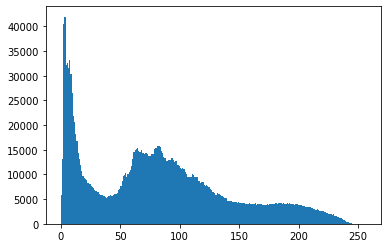

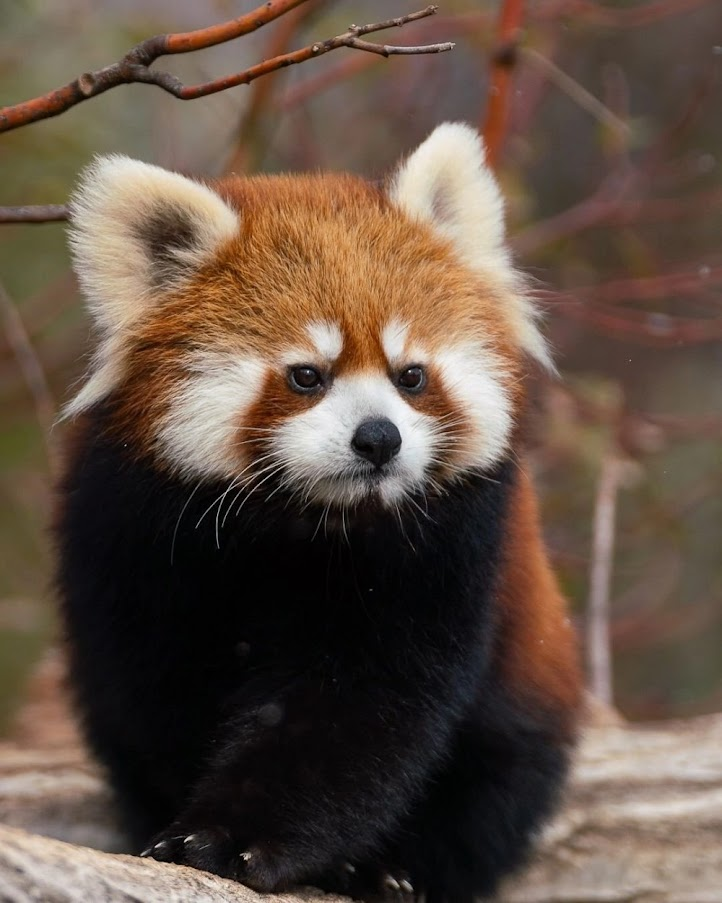

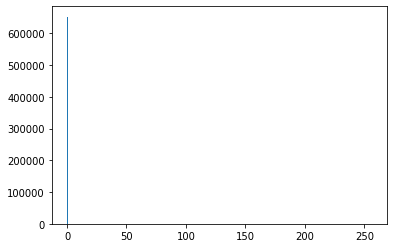

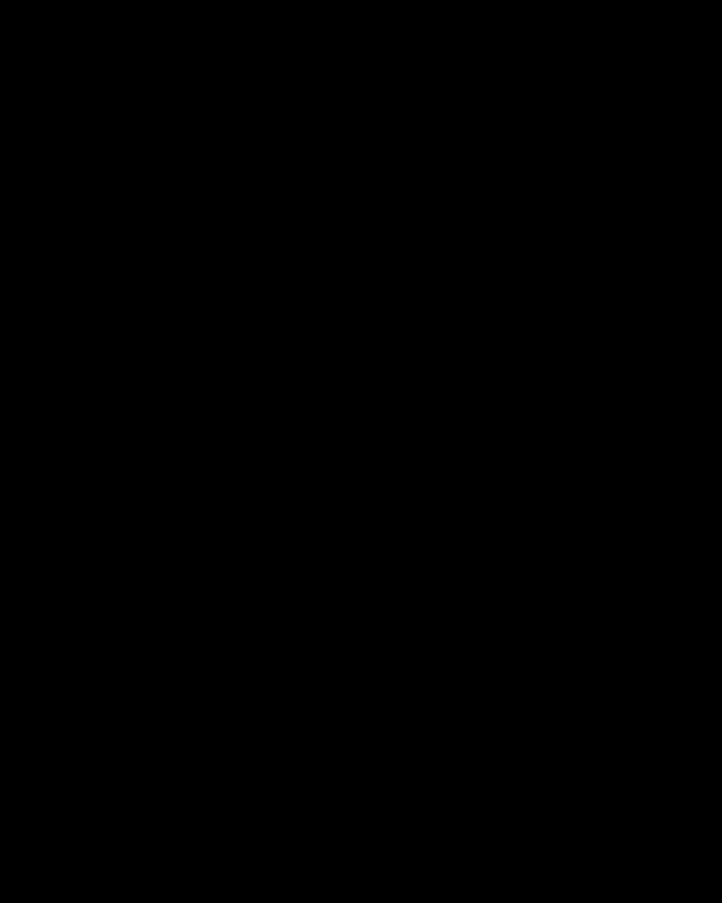

ValueError: ignored

In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow

def draw_bright_hist(img: np.ndarray) -> None:
  plt.hist(img.ravel(), 256, [0, 256])
  plt.show()

def binarize(img: np.ndarray, g: int, 
             x_min: int, y_min: int, x_max: int, y_max: int) -> np.ndarray:
  h = img.shape[0]
  w = img.shape[1]
  new_img = np.zeros((h,w),np.uint8)
  for i in range(h):
    for j in range(w):
      if (new_img[i, j]) > g or ((i < y_max and i > y_min) and (j > x_min and j < x_max)):
        new_img[i, j] = 255
      else:
        new_img[i, j] = 0

  return new_img

def sobel_operator(img: np.ndarray) -> np.ndarray:
    sobel_img = np.copy(img)
    size = sobel_img.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2 * img[i][j - 1] + img[i + 1][j - 1]) - (
                    img[i - 1][j + 1] + 2 * img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2 * img[i - 1][j] + img[i - 1][j + 1]) - (
                    img[i + 1][j - 1] + 2 * img[i + 1][j] + img[i + 1][j + 1])
            sobel_img[i][j] = (np.sqrt(gx ** 2 + gy ** 2), 255)
    return sobel_img

buba = cv.imread('buba.jpg')
draw_bright_hist(buba)
cv2_imshow(buba)

binary_buba = binarize(buba, 100, 100, 100, 100, 100)
draw_bright_hist(binary_buba)
cv2_imshow(binary_buba)

sobel_buba = sobel_operator(buba)
draw_bright_hist(sobel_buba)
cv2_imshow(sobel_buba)

